
<h1 align="center">Reviews summarizing Project</h1>

## Project Description 

This proejct is about building an algorithm that'd be able to take all the reviews for a certain product and generate one single review that summarizes all the reviews. 

So that instead of having a customer reading 200 reviews, he’ll only have to read one review. 

In this case i crawled the Nike.com website using a scrapping tool called Scrappy while using a container and gathered all the data about the Men's shoes, then the algorithm was able to create a summarized review for every single shoe. The algorithm was also able to clean the data from any duplicate reviews and clean the data so it doesn’t show products that don't have any reviews. Although the more data and reviews there's for a shoe, the easier it is for the algorithm to create a summzarized review.

In [31]:
#from google.colab import drive 
#drive.mount('/content/drive')
#import json
#f = open("/content/drive/MyDrive/data/nike_all_mens.json")
#data = json.load(f)

In [32]:
#Importing the data and cleaning it so that it only has the reviews

import json
f = open("/Users/abdelrahmanibrahim/Documents/Data science Bootcamp/Final Project/data/nike_all_mens.json")
data = json.load(f)

reviews = []
shows =[]
body = ""

for key in data:
  try:
    #pass
    body = key['title']
    
    for keys in key['reviews']['reviews']:
      shows.append(body)
      reviews.append(keys['body'])

    #
  except:
    pass
import pandas as pd 
df = pd.DataFrame({'review':reviews,
        'Name':shows})

df

,review,Name
0,"This is my fifth pair of vapormaxs and I always fall in love with the experience all over again, time and time again. Great purchase. And tip, if u have a wide fit, go a size up, if narrow, 1/2 size up.",Nike Air VaporMax 2021 FK
1,Me and my wife love our vapor max,Nike Air VaporMax 2021 FK
2,"The Vapormax 2021 is an okay sneaker but, in my honest opinion, not worth the premium price tag given the other options that Nike offers at similar price points. The Vapormax 2021 is definitely a step up from previous with the improved air unit providing better stability and the traditional laces, rather than the pully lace system seen on the Vapormax 2020, but the problem of stability still persists in a less",Nike Air VaporMax 2021 FK
3,I love the shoe just wish I could have got it on sale :-) but it was a great buy,Nike Air VaporMax 2021 FK
4,Superb trainers as always,Nike Air VaporMax 2021 FK
...,...,...
2971,Nike knocked it out the park with this one. Best Metcon ever. Perfect fit and super comfortable.,Nike Metcon 7
2972,"Amazing shoes, fit and comfort excellent, runs true to size and great for my wide feet.",Nike Metcon 7
2973,"If you want accidental salmon colored laces, buy the shoe",Nike Metcon 7
2974,"Super look super confort mais ...Beaucoup moins respirant , on sent une double épaisseur qui va forcément s'abimer voire se trouer de l'intérieur . À ce niveau là , la metcon 6 était parfaite .La semelle est très agrippante mais aussi beaucoup moins durable , le react est très proch",Nike Metcon 7


In [33]:
print(df.nunique())
print(df.shape)


review    2852
Name       132
dtype: int64
(2976, 2)


In [34]:
#Algorithm to summarize the reviews using nltk, re and heapq libraries
#This algorithm also only chooses english words and filters the reviews for certain elements 

def GetSummary(df):
  article_text = ""
  import re
  import nltk
  for p in df ['review']:
    
    article_text += p
  # Removing Square Brackets and Extra Spaces
  article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
  article_text = re.sub(r'\s+', ' ', article_text)
  # Removing special characters and digits
  formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
  formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
  sentence_list = nltk.sent_tokenize(article_text)

  ##
 
  stopwords = nltk.corpus.stopwords.words('english')
  word_frequencies = {}
  for word in nltk.word_tokenize(formatted_article_text):
      if word not in stopwords:
          if word not in word_frequencies.keys():
              word_frequencies[word] = 1
          else:
              word_frequencies[word] += 1

  ##
  maximum_frequncy = max(word_frequencies.values())

  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
  ##
  sentence_scores = {}
  for sent in sentence_list:
      for word in nltk.word_tokenize(sent.lower()):
          if word in word_frequencies.keys():
              if len(sent.split(' ')) < 30:
                  if sent not in sentence_scores.keys():
                      sentence_scores[sent] = word_frequencies[word]
                  else:
                      sentence_scores[sent] += word_frequencies[word]
  import heapq
  summary_sentences = heapq.nlargest(3, sentence_scores, key=sentence_scores.get)

  summary = ' '.join(summary_sentences)
  return summary

In [35]:

title = []
summary = []
countReviewas = []
for shoes in df['Name'].unique():
  title.append(shoes)
  value_list =[]
  value_list.append(shoes)
  boolean_series = df.Name.isin( value_list)
  filtered_df = df[boolean_series]
  filtered_df =filtered_df.drop_duplicates(subset=['review'], keep='first')

 
  countReviewas.append( filtered_df.shape[0])
  summary.append(GetSummary(filtered_df))

dff = pd.DataFrame({'Name':title,'Summary':summary,'CountReviews':countReviewas})
dff
#for sho in df['Name'].unique():
  #print(sho)

,Name,Summary,CountReviews
0,Nike Air VaporMax 2021 FK,Great shoes Thank you Nike all great products love vapor maxVERY COMFORTABLE AND LIGHWEIGHTThe most comfortable trainers I’ve ever had on. shoe is very comfortable and has extra support on the heel part of the shoe making them feel more secure. Overall great shoeI have the vapormax fk2 and I think they very great!Really comfortable and light shoe.,61
1,Nike Waffle One,"!Great shoes, great design, super comfortable! True to size comfortable and looks smartThe color of the shoe is awesome. Wish it was as easy to get shoes on SNKRS app as it was to get these.These shoes are so so so comfortable.",50
2,Zoom Freak 3,I wouldn’t change anything 10/10These shoes are the most comfortable shoes I have found. You can’t go wrong either way.These shoes were very comfortable and provided support for my feet for different activities including basketball and running. I prefer more basic style shoes but these pass the basic but with flair shoes.,31
3,Nike Zoom Fly 4,Best pair of shoes out of the box I’ve owned. Wider tow box than other Nikes I’ve tried lately. Had the zoom fly 2 and liked them as well.,1
4,Air Jordan XXXVI 'First Light',"The nods to the OG 6 are there, and are subtle so the don't overpower the shoe. The only *bad* thing is that they run small in the toe box. That upper is so light and breathes like crazy.",4
...,...,...,...
127,Air Jordan XXXV 'Centre of Gravity',"Look great, feel fantastically supportive and light. Cannot wait to light up the court in these.Very comfortable but you have to break it in first. Looks bulky because of the eclipse plate but it’s really great for support.",4
128,Nike Savaleos,"I did but it was still too small...so i would say go a 1 full size up!Great shoes, good fit. You will just end up with shoes that are too big, like me.These were great looking and looks durable but you definitely need to size up.. I'm a size 10 and they fit true too size.Quality seemed ok but they are waaaaayyyy to tight!",9
129,Nike Air Max SC,"Bubble looks cheap, material isn’t quality and generally feel like a poor mams max 90. Saw these online - wanted an alternative to a max 90 or max 1. Unfortunately they don’t come close.",1
130,Nike SB Chron 2 Canvas,"These shoes were a great price, arrived quickly and look great.Good quality and fit much better than on the picture I am impressed",2


In [36]:
print(dff['Name'][0])
print(dff['Summary'][0])

Nike Air VaporMax 2021 FK
Great shoes Thank you Nike all great products love vapor maxVERY COMFORTABLE AND LIGHWEIGHTThe most comfortable trainers I’ve ever had on. shoe is very comfortable and has extra support on the heel part of the shoe making them feel more secure. Overall great shoeI have the vapormax fk2 and I think they very great!Really comfortable and light shoe.


In [41]:
#Interactive Model Where you input the name of the shoe and it shows you all the reviews for this product and it's summarized review 

shoeName = "Nike Wildhorse 7"
value_list =[]
value_list.append(shoeName)
boolean_series = df.Name.isin( value_list)
boolean_series1 = dff.Name.isin( value_list)

all_reviews = df[boolean_series]

summary = dff[boolean_series1]

pd.set_option('display.max_colwidth', None)
#print(all_reviews.review.trim())
print("\t\t\t---------------All Reviews--------------------------------------------")
pd.set_option('display.max_colwidth', None)
print(all_reviews['review'])

print("\t\t\t---------------Summary Review--------------------------------------------")
summary['Summary']


			---------------All Reviews--------------------------------------------
1628                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Finally a multi purpose shoes (running,walking,golf and wo

63    One of the most comfortable shoes I've ever bought for running.I love funky colors on shoes and this trail shoe had them all. Finally a multi purpose shoes (running,walking,golf and work)can’t ask for morel,highly recommended,Pegasus trail next.thanks NIKE 👍🏻👍🏻Really a great shoe. I needed new hiking shoes as well as new running shoes and went with the hybrid Wildhorse 7.
Name: Summary, dtype: object

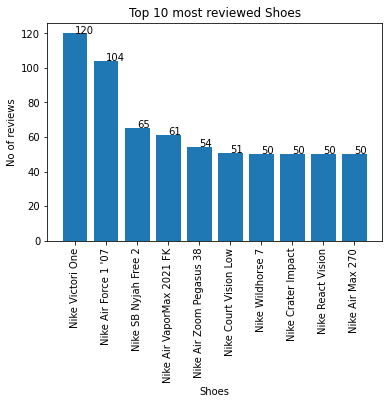

In [38]:
#Using the data to see the most reviewed shoes, just to have an insight
import matplotlib.pyplot as plt
Sorted = dff.sort_values('CountReviews',ascending=False)  
Shoes = Sorted['Name'].head(10)
CountReviews = Sorted['CountReviews'].head(10)

plt.bar(Shoes,CountReviews)
plt.title('Top 10 most reviewed Shoes')
plt.xlabel('Shoes')
plt.ylabel('No of reviews')

plt.xticks(rotation=90)
for index, value in enumerate(CountReviews):
 plt.text(index,value,str(value))


plt.show()